## By:
## Nirav Jadeja - B00789139

## Question 1

### Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('houses.csv', header='infer')

In [2]:
columns_headers = data.columns.values

X_data = pd.DataFrame(data, columns=columns_headers[1:])
X_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [3]:
Y = pd.DataFrame(data, columns=columns_headers[:1])

X1_data = pd.DataFrame(data, columns=['sqft_living'])
X1_data.describe()

,sqft_living
count,21613.000000
mean,2079.899736
std,918.440897
min,290.000000
25%,1427.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


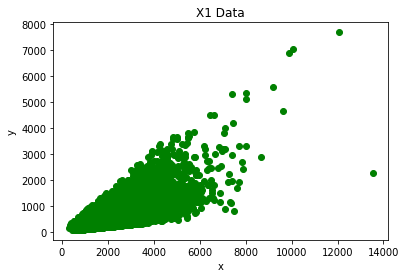

In [4]:
plt.scatter(X1_data, Y, c='g', alpha=1)
plt.title('X1 Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

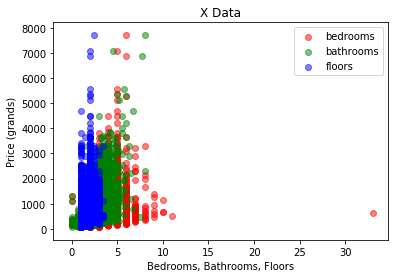

In [5]:
plt.scatter(X_data['bedrooms'], Y, c='r', alpha=0.5, label='bedrooms')
plt.scatter(X_data['bathrooms'], Y, c='g', alpha=0.5, label='bathrooms')
plt.scatter(X_data['floors'], Y, c='b', alpha=0.5, label='floors')
plt.xlabel('Bedrooms, Bathrooms, Floors')
plt.ylabel('Price (grands)')
plt.title('X Data')
plt.legend()
plt.show()

#### Data normalization and transfromation

In [6]:
X = (X_data - X_data.mean()) / X_data.std()
X1 = (X1_data - X1_data.mean()) / X1_data.std()

x0 = np.ones([X.shape[0], 1])

X = np.concatenate((x0,X),axis=1)
X1 = np.concatenate((x0,X1),axis=1)

Y = Y.values

In [7]:
def computeCost(X,y,theta):

    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):

    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)

    return theta,cost

In [8]:
def linear_regression(X, Y, learning_rate, iterations):
    
    theta = np.zeros([1,int(X.shape[1])])
    model_parameters,cost = gradientDescent(X,Y,theta,iterations,learning_rate)
    return model_parameters, cost

def predict(X, model_parameters):
    
    return X.dot(model_parameters.T)

#### model for X and X1 data

In [9]:
learning_rate = 0.01
iterations = 10000

model_parameters, cost = linear_regression(X, Y, learning_rate, iterations)
finalCost = computeCost(X,Y,model_parameters)

model_parameters_X1, cost_X1 = linear_regression(X1, Y, learning_rate, iterations)
finalCost_X1 = computeCost(X1,Y,model_parameters_X1)

print('Final cost value for dataframe X: ', finalCost)
print('Final cost value for dataframe X1', finalCost_X1)

Final cost value for dataframe X:  23340.485934199172
Final cost value for dataframe X1 34175.64341651991


In [10]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

#### RMSE value and R2 score for X and X1 data

In [11]:
Y_prediction = predict(X, model_parameters)
Y_prediction_X1 = predict(X1, model_parameters_X1)

print('RMSE value WITHOUT sklearn for X data: ',float(rmse(Y, Y_prediction)))
print('R2 Score WITHOUT sklearn for X data: ',float(r2_score(Y, Y_prediction)))

print('\nRMSE value WITHOUT sklearn for X1 data: ',float(rmse(Y, Y_prediction_X1)))
print('R2 Score WITHOUT sklearn for X1 data: ',float(r2_score(Y, Y_prediction_X1)))

RMSE value WITHOUT sklearn for X data:  216.05779751815984
R2 Score WITHOUT sklearn for X data:  0.6536406881993353

RMSE value WITHOUT sklearn for X1 data:  261.4407903006713
R2 Score WITHOUT sklearn for X1 data:  0.49285321790379855


#### Plotting the cost history for both data

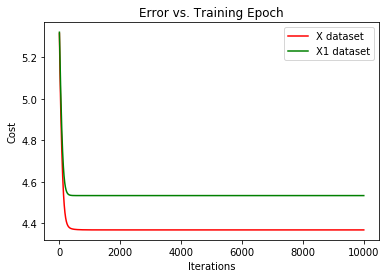

In [12]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), np.log10(cost), 'r', label='X dataset')
ax.plot(np.arange(iterations), np.log10(cost_X1), 'g', label='X1 dataset')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')
ax.legend()

### Lets compare our result with sklearn's regression result

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model Intialization
reg = LinearRegression()
reg_X1 = LinearRegression()

# Data Fitting
reg = reg.fit(X, Y)
reg_X1 = reg_X1.fit(X1, Y)

# Y Prediction
Y_pred = reg.predict(X)
Y_pred_X1 = reg_X1.predict(X1)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
rmse_X1 = np.sqrt(mean_squared_error(Y, Y_pred_X1))

r2 = reg.score(X, Y)
r2_X1 = reg_X1.score(X1, Y)

print('R2 Score WITH sklearn for X data: ', rmse)
print('R2 Score WITHOUT sklearn for X data: ', r2)

print('\nR2 Score WITH sklearn for X1 data: ', rmse_X1)
print('R2 Score WITHOUT sklearn for X1 data: ', r2_X1)

R2 Score WITH sklearn for X data:  216.05779751816027
R2 Score WITHOUT sklearn for X data:  0.6536406881993313

R2 Score WITH sklearn for X1 data:  261.4407903006717
R2 Score WITHOUT sklearn for X1 data:  0.49285321790379316


### Now change the learning rate values i.e 10, 1, 0.1, 0.01, and 0.001

In [14]:
def graph_plot(iterations, cost_value, color, labelName, x_label, y_label, title):
    
    fig, ax = plt.subplots()  
    ax.plot(np.arange(iterations), np.log(cost_value), color, label=labelName)
    ax.set_xlabel(x_label)  
    ax.set_ylabel(y_label)  
    ax.set_title(title)
    ax.legend()

#### Learning rate = 10

C:\Users\nirav\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nirav\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


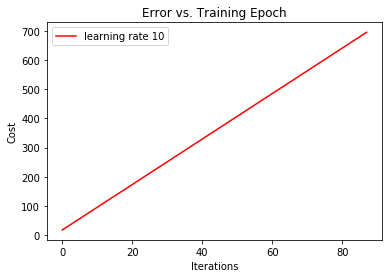

In [15]:
x_label = 'Iterations'
y_label = 'Cost'
graphTitle = 'Error vs. Training Epoch'
color = 'r'

learning_rate = 10
iterations = 10000

model_parameters, finalCost, cost = None, None, None
model_parameters, cost = linear_regression(X, Y, learning_rate, iterations)
finalCost = computeCost(X,Y,model_parameters)

graph_plot(iterations, cost, color,'learning rate 10', x_label, y_label, graphTitle)

#### Learning rate = 1

C:\Users\nirav\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nirav\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


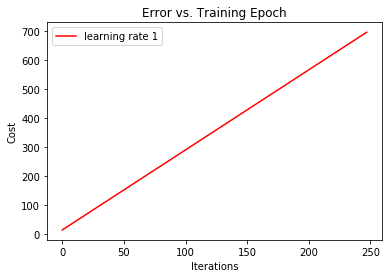

In [16]:
learning_rate = 1

model_parameters, finalCost, cost = None, None, None
model_parameters, cost = linear_regression(X, Y, learning_rate, iterations)
finalCost = computeCost(X,Y,model_parameters)

graph_plot(iterations, cost, color,'learning rate 1', x_label, y_label, graphTitle)

#### Learning rate = 0.1

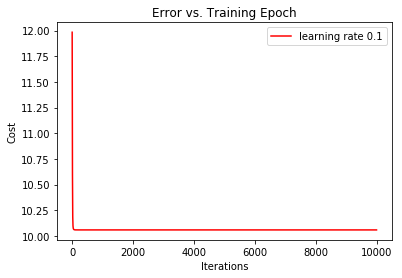

In [17]:
learning_rate = 0.1

model_parameters, finalCost, cost = None, None, None
model_parameters, cost = linear_regression(X, Y, learning_rate, iterations)
finalCost = computeCost(X,Y,model_parameters)

graph_plot(iterations, cost, color,'learning rate 0.1', x_label, y_label, graphTitle)

#### Learning rate = 0.01

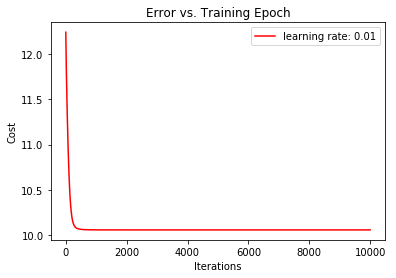

In [18]:
learning_rate = 0.01

model_parameters, finalCost, cost = None, None, None
model_parameters, cost = linear_regression(X, Y, learning_rate, iterations)
finalCost = computeCost(X,Y,model_parameters)

graph_plot(iterations, cost, color,'learning rate: 0.01', x_label, y_label, graphTitle)

#### Learning rate = 0.001

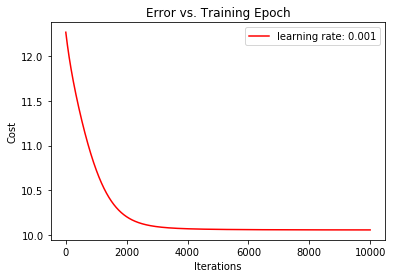

In [19]:
learning_rate = 0.001

model_parameters, finalCost, cost = None, None, None
model_parameters, cost = linear_regression(X, Y, learning_rate, iterations)
finalCost = computeCost(X,Y,model_parameters)

graph_plot(iterations, cost, color,'learning rate: 0.001', x_label, y_label, graphTitle)

#### Plotting the model for X1 data

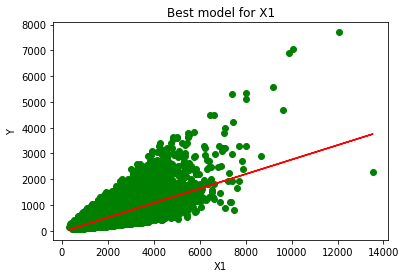

In [20]:
plt.scatter(X1_data, Y, c='g', alpha=1)
plt.plot(X1_data, Y_prediction_X1, c='r' )
plt.title('Best model for X1')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

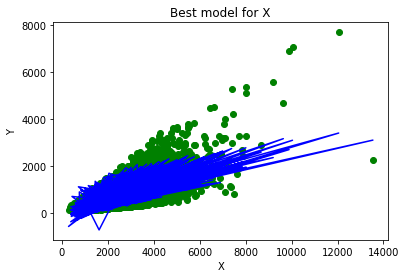

In [21]:
x_values=X_data['sqft_living'].values[:,np.newaxis]

plt.scatter(x_values, Y, c='g', alpha=1)
plt.plot(x_values, Y_prediction, c='b' )
plt.title('Best model for X')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Here, straight line is not possible for this case due to these variaations. Hence, plotted in the separate graph

#### Ridge Regression

#### For X1 data

In [22]:
def ridge_regression(x_data, y_data, alpha):
    A = np.asmatrix(x_data)
    b = np.asmatrix(y_data)
    I = np.identity(A.shape[1])
    x = np.linalg.inv(A.T*A + alpha * I)*A.T*b
    ridge_model_parameters = x.T
    return ridge_model_parameters

In [23]:
alpha = 1

model_parameters_ridge_X1 = ridge_regression(X1, Y, alpha)
newCost = computeCost(X1, Y, model_parameters_ridge_X1)

Y_prediction_ridge = predict(X1, model_parameters_ridge_X1)

print('Final cost value for X1 data is: ', newCost)
print('RMSE value with Ridge regression: ', float(np.sqrt(mean_squared_error(Y, Y_prediction_ridge))))

Final cost value for X1 data is:  34175.643799817255
RMSE value with Ridge regression:  261.4407917667679


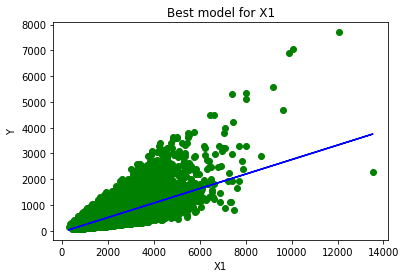

In [24]:
plt.scatter(X1_data, Y, c='g', alpha=1)
plt.plot(X1_data, Y_prediction_ridge, c='b' )
plt.title('Best model for X1')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

#### For X Data

In [25]:
model_parameters_ridge_X = ridge_regression(X, Y, alpha)
newCost = computeCost(X, Y, model_parameters_ridge_X)

Y_prediction_ridge_X = predict(X, model_parameters_ridge_X)

print('Final cost value for X data: ', newCost)
print('RMSE value with Ridge regression: ', float(np.sqrt(mean_squared_error(Y, Y_prediction_ridge_X))))

Final cost value for X data:  23340.486337128692
RMSE value with Ridge regression:  216.0577993830757


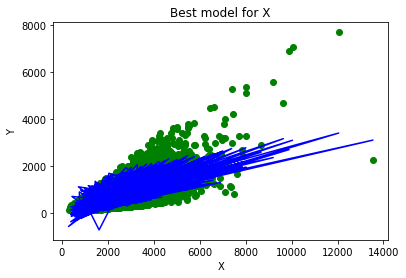

In [26]:
x_values=X_data['sqft_living'].values[:,np.newaxis]

plt.scatter(x_values, Y, c='g', alpha=1)
plt.plot(x_values, Y_prediction_ridge_X, c='b' )
plt.title('Best model for X')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Now let's try with different alpha rate

In [27]:
alpha = 2

model_parameters_ridge_X1 = ridge_regression(X1, Y, alpha)
newCost = computeCost(X1, Y, model_parameters_ridge_X1)

Y_prediction_ridge = predict(X1, model_parameters_ridge_X1)

print('Final cost value for X1 data is: ', newCost)
print('RMSE value with Ridge regression: ', float(np.sqrt(mean_squared_error(Y, Y_prediction_ridge))))

Final cost value for X1 data is:  34175.644949567424
RMSE value with Ridge regression:  261.4407961645138


In [28]:
model_parameters_ridge_X = ridge_regression(X, Y, alpha)
newCost = computeCost(X, Y, model_parameters_ridge_X)

Y_prediction_ridge_X = predict(X, model_parameters_ridge_X)

print('Final cost value for X data: ', newCost)
print('RMSE value with Ridge regression: ', float(np.sqrt(mean_squared_error(Y, Y_prediction_ridge_X))))

Final cost value for X data:  23340.487545703632
RMSE value with Ridge regression:  216.05780497683315


#### after, applying regression to both data, I can say that it doesn't have much effect as we might be having optimal model before.  after trying with different alpha values, there is no change in cost value and RMSE value for X and X1 data

## Question 2

#### Given that the following probabilities: The marginal probability that the alternator is broken is 1/1000 and the marginal probability that the fan belt is broken is 2/100. The probability that the battery is charging when either the alternator or the fan belt is broken is zero. However, even if both are working there is a 5/1000 probability that the battery is not charging. When the battery is not charging then there is a 90% chance that the battery is flat, though even if the battery is charging then there is a 10% chance that the battery is flat. Finally, the car does not start if either the battery is flat, or there is no gas, or the starter is broken. However. Even if these three conditions don’t hold there is a 5% chance that the car won’t start. 

In [29]:
import lea

alternatorBroken = lea.event(0.001)
fanBeltBroken = lea.event(0.02)

batteryNotCharging = lea.Lea.cpt(
(~alternatorBroken & ~fanBeltBroken, lea.event(0.005)),
(alternatorBroken & ~fanBeltBroken, lea.event(1)),
(~alternatorBroken & fanBeltBroken, lea.event(1)),    
(alternatorBroken & fanBeltBroken, lea.event(1)))

batteryFlat = lea.Lea.cpt(
(~batteryNotCharging, lea.event(0.1)),
(batteryNotCharging, lea.event(0.9)))

carWontStart = lea.Lea.cpt(
(~batteryFlat, lea.event(0.05)),
(batteryFlat, lea.event(1)))

#### Draw the causal model of this system

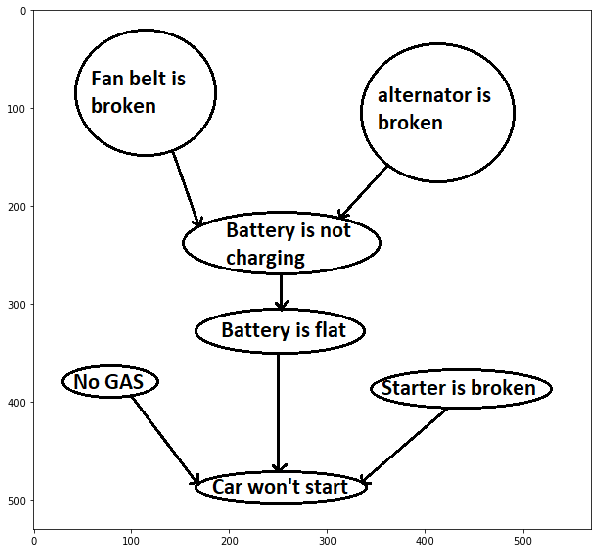

In [30]:
%matplotlib inline
import matplotlib.image as mpimg
img = mpimg.imread('2_1.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)

#### What is the probability that the alternator is broken given that the car won’t start? 

In [31]:
print(lea.Pf((alternatorBroken).given(carWontStart)))

0.005496004507962575


#### What is the probability that the fan belt is broken given that the car won’t start? 

In [32]:
print(lea.Pf((fanBeltBroken).given(carWontStart)))

0.10992009015925151


#### What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?

In [33]:
print(lea.Pf(fanBeltBroken.given(carWontStart & alternatorBroken)))

0.02


#### What is the probability that the alternator and the fan belt is broken given that the car won’t start? 

In [34]:
print(lea.Pf((alternatorBroken & fanBeltBroken).given(carWontStart)))

0.0001099200901592515
